In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [38]:
df=pd.read_csv('insurance.csv')

In [39]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
df.size

9366

In [41]:
df.shape

(1338, 7)

In [42]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [43]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [44]:
df.duplicated().sum()

1

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [46]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [49]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [50]:
df['age'].duplicated().sum()

1291

# Univarient analysis

In [72]:
numeric=df.select_dtypes(include=['int64','float64']).columns
numeric

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [75]:
category=df.select_dtypes(include=['object']).columns
category

Index(['sex', 'smoker', 'region'], dtype='object')

In [51]:
def check_gaussian(data):
    sns.histplot(data,kde=True)
    plt.show()
    stats.probplot(data,dist='norm',plot=plt)
    plt.show()
    a=stats.anderson(data,dist='norm')
    if a.statistic>a.critical_values[2]:
        print('column is non-gaussian')
    else:
        print('column is gaussian')
    

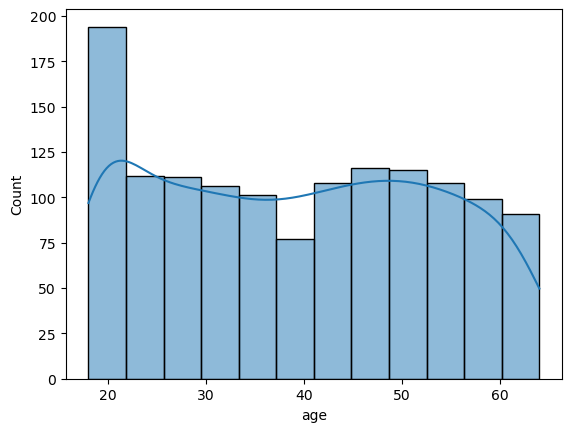

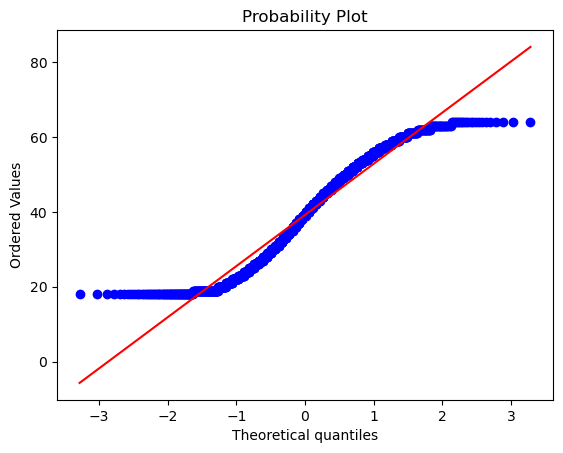

column is non-gaussian


In [52]:
check_gaussian(df['age'])

<Axes: ylabel='age'>

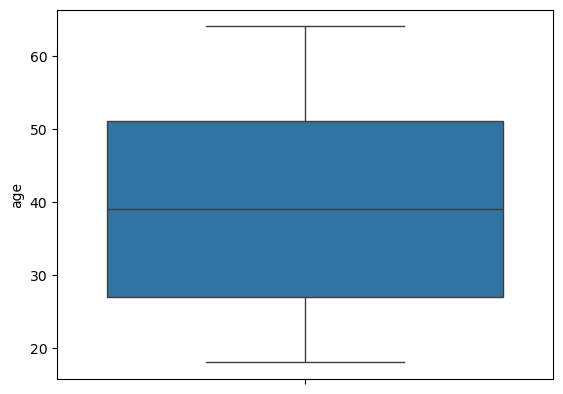

In [53]:
sns.boxplot(df['age'])

<Axes: ylabel='age'>

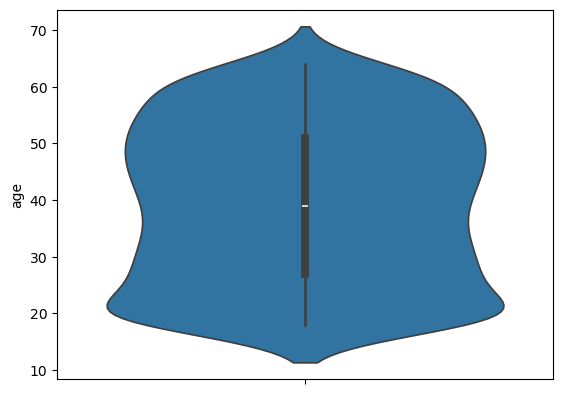

In [54]:
sns.violinplot(df['age'])

In [55]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

<Axes: xlabel='count', ylabel='sex'>

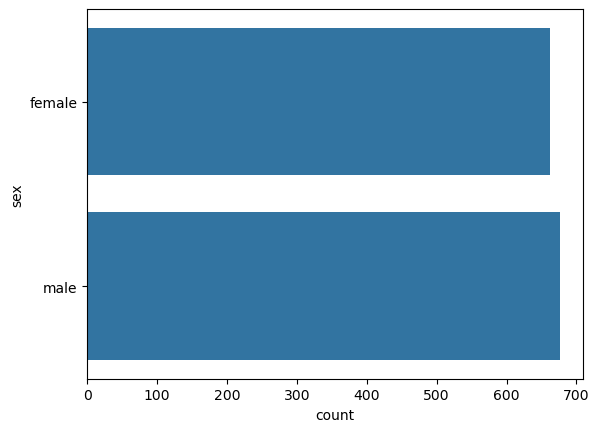

In [56]:
sns.countplot(df['sex'])

In [57]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

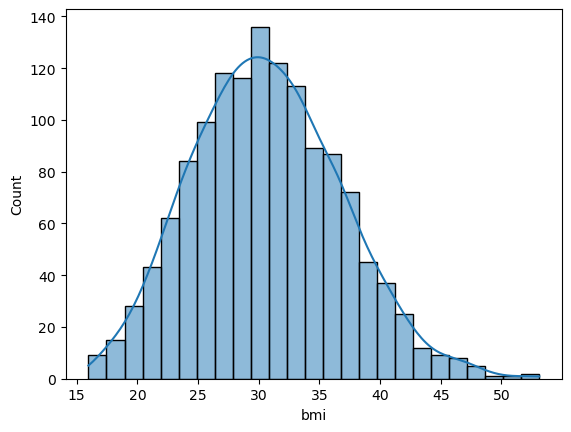

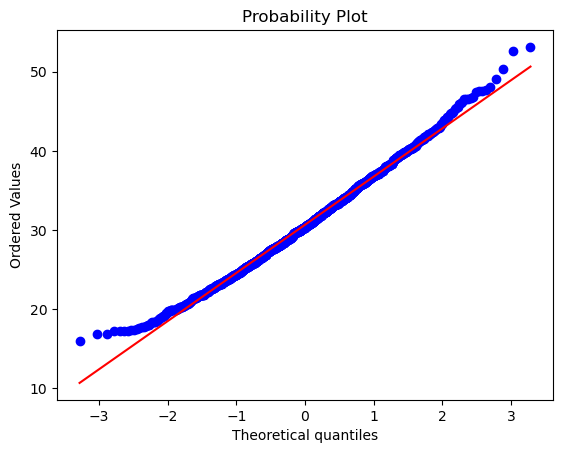

column is non-gaussian


In [58]:
check_gaussian(df['bmi'])

<Axes: ylabel='bmi'>

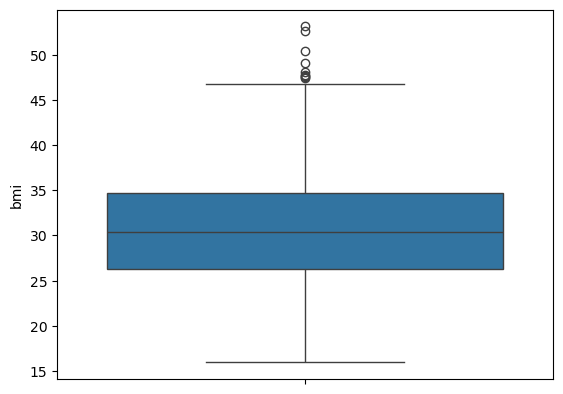

In [59]:
sns.boxplot(df['bmi'])

In [60]:
df['bmi'].skew()

0.2840471105987448

In [61]:
def fix_outliers_NG(data):
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    data=data.apply(lambda x:lb if (x<lb) else ub if (x>ub) else x)
    return data

In [62]:
fix_outliers_NG(df['bmi'])

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

<Axes: ylabel='bmi'>

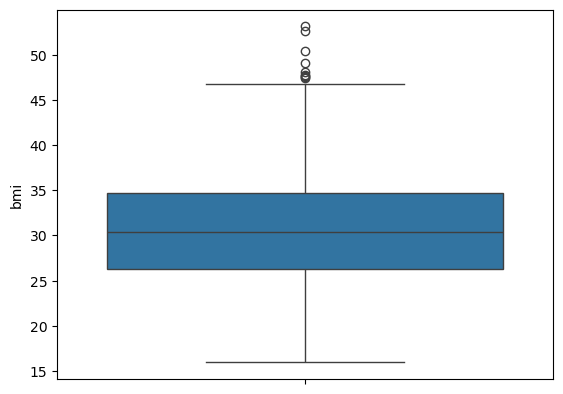

In [63]:
sns.boxplot(df['bmi'])

In [64]:
df['bmi'].skew()

0.2840471105987448

In [65]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[['bmi']] = scaler.fit_transform(df[['bmi']])


<Axes: >

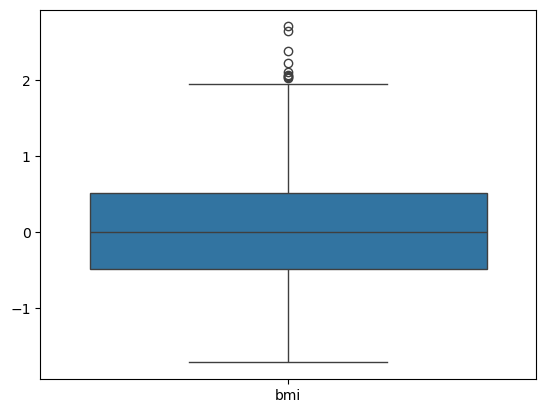

In [67]:
sns.boxplot(df[['bmi']])

In [68]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [76]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [77]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

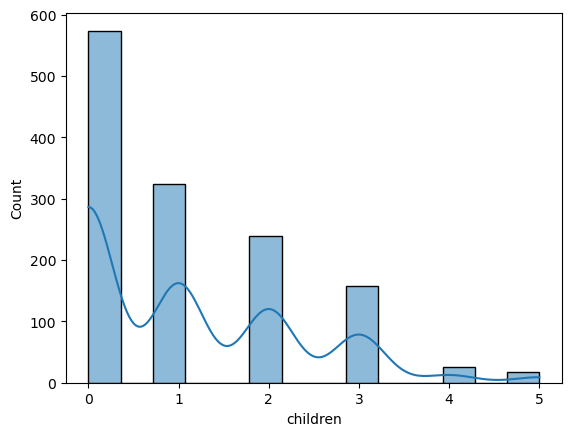

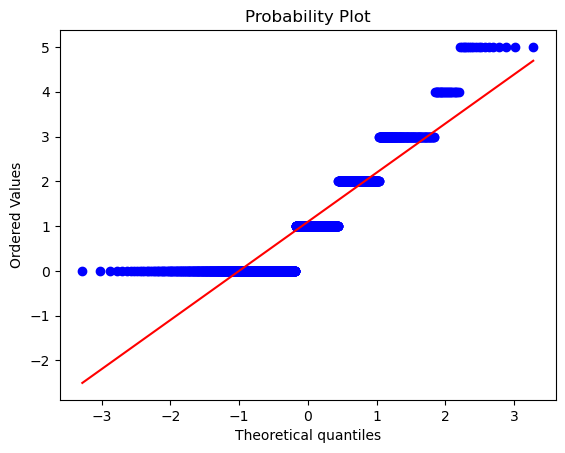

column is non-gaussian


In [78]:
check_gaussian(df['children'])

<Axes: ylabel='children'>

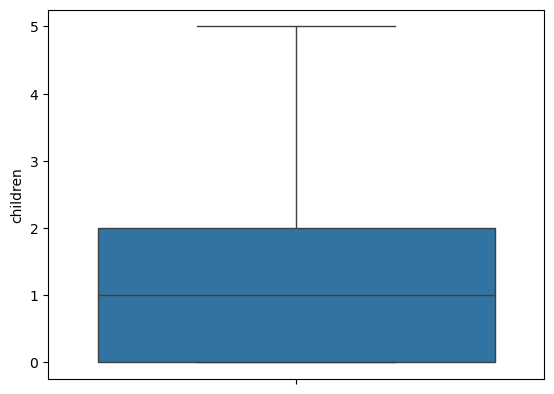

In [79]:
sns.boxplot(df['children'])

In [81]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

<Axes: xlabel='count', ylabel='smoker'>

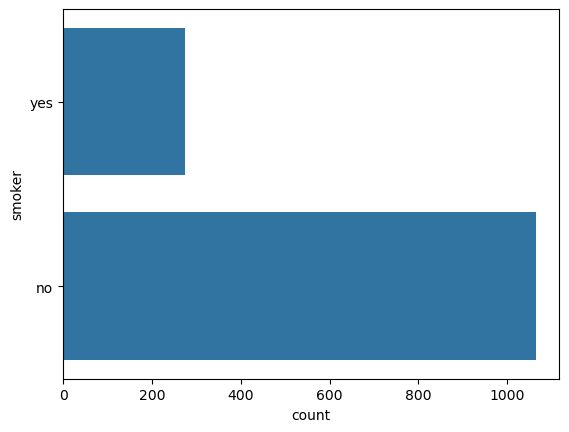

In [82]:
sns.countplot(df['smoker'])

In [84]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: xlabel='count', ylabel='region'>

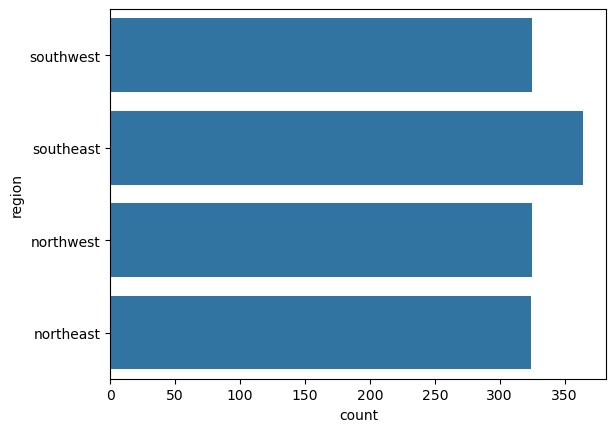

In [85]:
sns.countplot(df['region'])

In [87]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

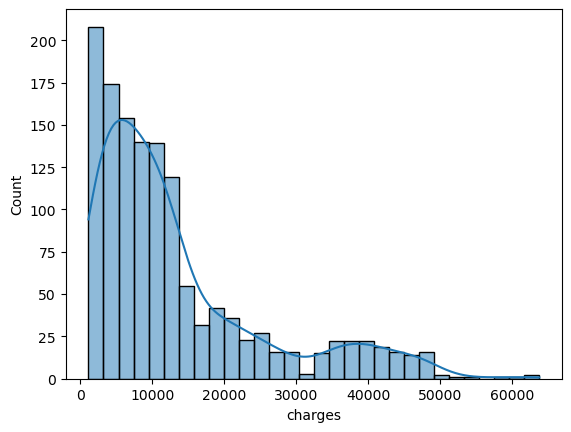

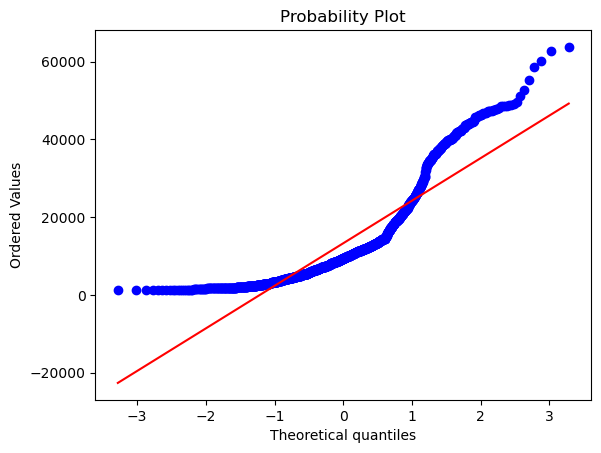

column is non-gaussian


In [88]:
check_gaussian(df['charges'])

<Axes: ylabel='charges'>

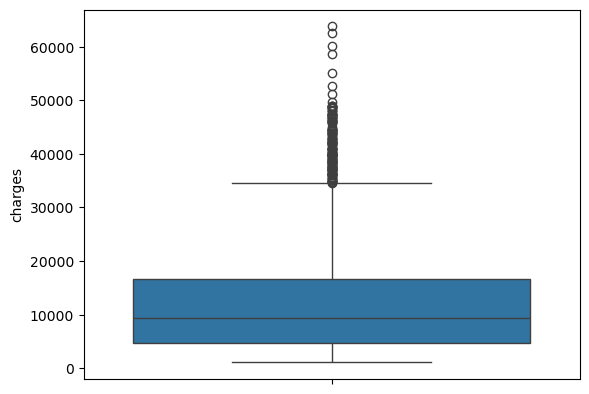

In [89]:
sns.boxplot(df['charges'])

In [90]:
fix_outliers_NG(df['charges'])

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [142]:
df['charges'].skew()

1.515879658024039

<Axes: ylabel='charges'>

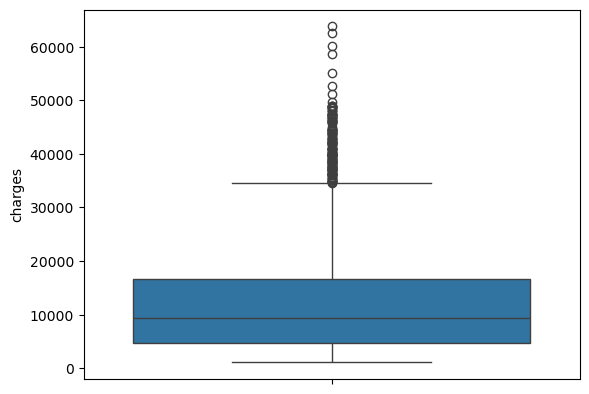

In [91]:
sns.boxplot(df['charges'])

In [178]:
df['log_charges'] = np.log(df['charges'])


In [180]:
df['log_charges'].skew()

-0.957100096793604

In [181]:
df['log_charges'].unique()

array([-4.61218505e-01,             nan,  5.73833387e-02,  4.96013223e-01,
        4.37293353e-01, -1.94078297e+00,  9.32318784e-01, -2.12916313e+00,
       -2.27736758e+00,  8.36057191e-01, -1.12926166e+00,  8.67055836e-01,
       -9.46306864e-01, -8.53205125e-01, -1.41642784e+00,  9.02068745e-01,
        7.89387713e-01, -9.97618585e-01,  1.25668905e+00, -6.47104847e-01,
        9.37680504e-01,  1.18168980e+00, -5.62943114e-02, -1.29850946e+00,
        9.02006552e-01,  1.75765493e-01,  8.68491920e-01,  1.16408686e+00,
       -1.03540819e+00,  7.39209289e-01,  1.52698988e-01,  5.57704697e-01,
       -8.03209940e-01, -8.96901811e-01, -3.62529755e-01, -5.03016830e-01,
       -1.61797539e+00, -1.53470717e+00, -1.79612694e+00,  8.47922113e-01,
       -1.97474503e+00,  9.39726389e-01, -1.55070163e-02,  1.05562827e+00,
       -1.95110229e+00, -1.94555860e+00, -2.03175760e+00,  5.58585660e-01,
        1.15868221e+00, -1.47466731e+00, -2.64581212e+00,  9.07947095e-02,
       -6.14185542e-01,  

In [145]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[['charges']] = scaler.fit_transform(df[['charges']])


<Axes: ylabel='charges_log'>

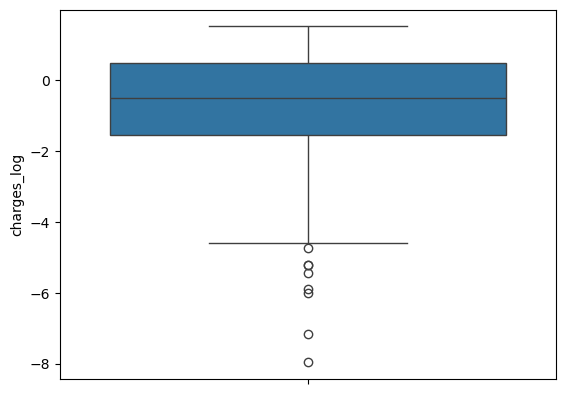

In [146]:
sns.boxplot(df['charges_log'])

# Bi varient analysis

<Axes: xlabel='age', ylabel='bmi'>

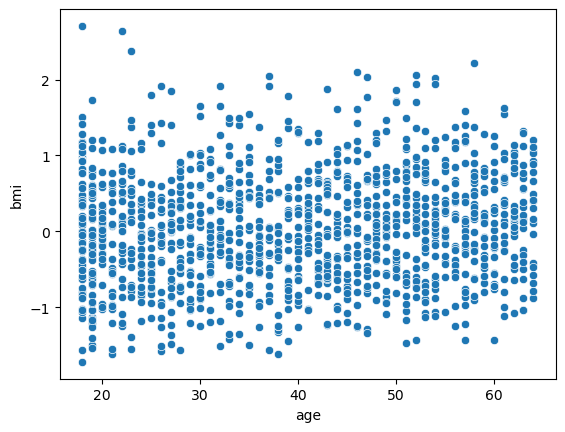

In [147]:
sns.scatterplot(x=df['age'],y=df['bmi'])

<Axes: xlabel='children', ylabel='charges'>

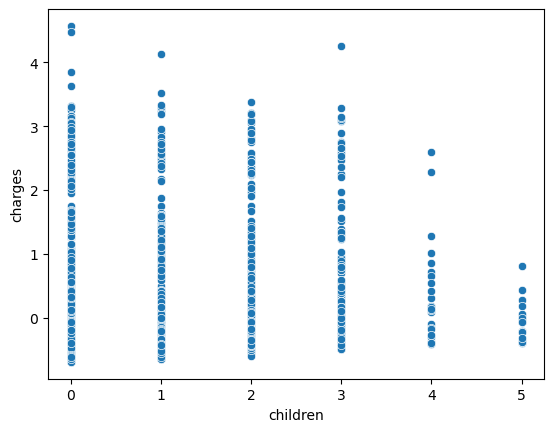

In [148]:
sns.scatterplot(x=df['children'],y=df['charges'])

In [98]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [110]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [106]:
from scipy.stats import ttest_ind

In [111]:
no=df[df['smoker']=='no']['age']
yes=df[df['smoker']=='yes']['age']

In [112]:
t_stats,p=ttest_ind(no,yes,alternative='less')

In [113]:
p

0.8197573548107979

In [114]:
t_stats,p=ttest_ind(no,yes,alternative='greater')

In [115]:
p

0.18024264518920208

In [117]:
t_stats,p=ttest_ind(no,yes,alternative='two-sided')

In [118]:
p

0.36048529037840416

## AS p value is greater than 0.05 we failed to reject the H0
## we can conclude that there is a significant difference in the means between the two groups.


In [121]:
male=df[df['sex']=='male']['bmi']
female=df[df['sex']=='female']['bmi']

In [123]:
from scipy.stats import ttest_ind

In [125]:
t_stats,p=ttest_ind(male,female,alternative='two-sided')

In [126]:
p

0.0899763717898503

## AS p value is greater than 0.05 we failed to reject the H0
## we can conclude that there is a significant difference in the means between the two groups.


In [129]:
southeast=df[df['region']=='southeast']['bmi']
southwest=df[df['region']=='southwest']['bmi']
northwest=df[df['region']=='northwest']['bmi']
northeast=df[df['region']=='northeast']['bmi']

In [130]:
from scipy.stats import f_oneway

In [132]:
f_stats,p=f_oneway(southeast,southwest,northwest,northeast)

In [133]:
p

1.881838913929143e-24

## AS P value is less than 0.05 we reject the null hypothesis H0
## There is statistically significance difference between the two groups

In [134]:
from scipy.stats import chi2_contingency

In [135]:
table=pd.crosstab(df['sex'],df['smoker'])

In [137]:
chi2,p,dof,excepted=chi2_contingency(table)

In [138]:
p

0.006548143503580696

# Multivarient analysis

## AS P value is less than 0.05 we reject the null hypothesis H0
## There is statistically significance difference between the two groups

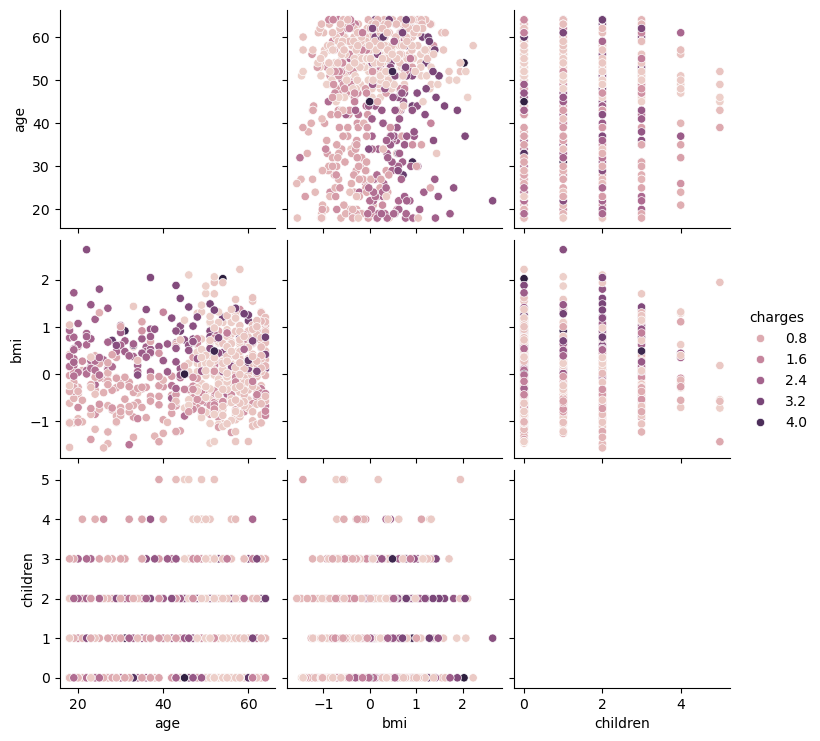

In [289]:
sns.pairplot(df[['age', 'bmi', 'sex', 'children', 'smoker', 'region', 'charges']], hue='charges')
plt.show()

<Axes: >

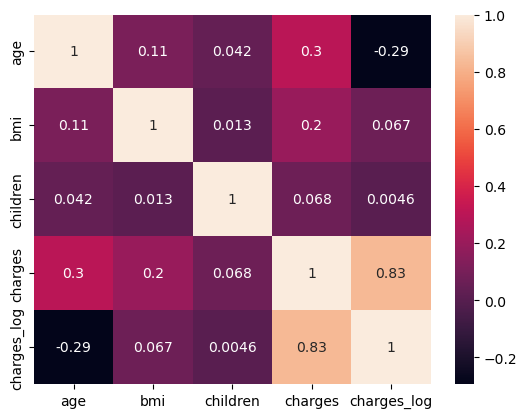

In [150]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

## Children and charges has the more co-relation
## bmi and charges has the least co-realtion

# LinearRegression

In [197]:
(df['charges'] <= 0).sum()  # should be 0


669

In [198]:
df = df[df['charges'] > 0].copy()



In [199]:
df

,age,sex,bmi,children,smoker,region,charges,charges_log,log_charges
0,19,female,-0.297708,0,yes,southwest,0.630515,-0.461219,-0.461219
3,33,male,-0.916344,0,no,northwest,1.059062,0.057383,0.057383
9,60,female,-0.543019,0,no,northwest,1.642161,0.496013,0.496013
11,62,female,-0.489431,0,yes,southeast,1.548510,0.437293,0.437293
13,56,female,1.121762,0,no,southeast,0.143591,-1.940783,-1.940783
...,...,...,...,...,...,...,...,...,...
1330,57,female,-0.554927,2,no,southeast,0.272877,-1.298735,-1.298735
1331,23,female,0.357249,0,no,southwest,0.118819,-2.130152,-2.130152
1332,52,female,1.702888,3,no,southwest,0.170564,-1.768643,-1.768643
1333,50,male,0.067877,3,no,northwest,0.102399,-2.278874,-2.278874


In [200]:
df['log_charges'] = np.log(df['charges'])


In [202]:
df['log_charges'].unique()

array([-4.61218505e-01,  5.73833387e-02,  4.96013223e-01,  4.37293353e-01,
       -1.94078297e+00,  9.32318784e-01, -2.12916313e+00, -2.27736758e+00,
        8.36057191e-01, -1.12926166e+00,  8.67055836e-01, -9.46306864e-01,
       -8.53205125e-01, -1.41642784e+00,  9.02068745e-01,  7.89387713e-01,
       -9.97618585e-01,  1.25668905e+00, -6.47104847e-01,  9.37680504e-01,
        1.18168980e+00, -5.62943114e-02, -1.29850946e+00,  9.02006552e-01,
        1.75765493e-01,  8.68491920e-01,  1.16408686e+00, -1.03540819e+00,
        7.39209289e-01,  1.52698988e-01,  5.57704697e-01, -8.03209940e-01,
       -8.96901811e-01, -3.62529755e-01, -5.03016830e-01, -1.61797539e+00,
       -1.53470717e+00, -1.79612694e+00,  8.47922113e-01, -1.97474503e+00,
        9.39726389e-01, -1.55070163e-02,  1.05562827e+00, -1.95110229e+00,
       -1.94555860e+00, -2.03175760e+00,  5.58585660e-01,  1.15868221e+00,
       -1.47466731e+00, -2.64581212e+00,  9.07947095e-02, -6.14185542e-01,
        5.29606236e-03,  

In [233]:
x = df.drop('charges', axis=1)
y = df['charges']

In [234]:
x_encoded = pd.get_dummies(x, drop_first=True)


In [226]:
from sklearn.model_selection import train_test_split

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=(0.2))

In [236]:
len(x_train)

535

In [237]:
len(y_train)

535

In [238]:
from sklearn.linear_model import LinearRegression

In [239]:
lr=LinearRegression()

In [240]:
lr.fit(x_train,y_train)

LinearRegression()

In [241]:
y_pred=lr.predict(x_test)

In [242]:
y_pred

array([ 1.26674528,  1.02251709,  0.29844911,  0.8437311 ,  0.74115615,
        1.57688423,  0.5347407 ,  0.54960152,  1.14476392,  0.98245225,
        0.65048842,  1.04286441,  1.88881819,  1.98963034,  0.66282553,
        1.10186281,  1.47338764,  1.37845431,  0.75087604,  2.3753469 ,
        2.82300993,  0.25129557,  0.94020814,  0.23968965,  0.90223507,
       -0.12294704,  0.49045567,  2.01549918,  1.2132132 ,  2.38535767,
        0.21785946,  1.47251777,  1.3518826 ,  2.39779871,  1.46912556,
        0.82717117,  1.50667114,  1.36260402,  1.28549777,  1.84864231,
        0.84859284, -0.10051407,  0.92815494,  1.33996738,  0.01568671,
        1.28399964,  0.6273449 ,  0.06659222,  1.62119555,  1.03686803,
        2.30885241,  0.13135208,  0.43739433,  1.42610444,  0.13568815,
        0.27036153,  2.17122161,  0.7149528 ,  0.36812419,  1.83246693,
        0.56484265,  1.01916033,  0.11701392,  0.03837402,  0.90819389,
        2.21293654,  1.69038193,  1.33905485,  0.71905152,  0.02

In [243]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [244]:
mean_absolute_error(y_test,y_pred)

0.34213909129989334

In [245]:
mean_squared_error(y_test,y_pred)

0.17205498819104317

In [246]:
r2_score(y_test,y_pred)

0.7956901917691697

# RandomForestRegressor

In [247]:
from sklearn.ensemble import RandomForestRegressor

In [248]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [249]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [250]:
y_pred=rf.predict(x_test)

In [251]:
y_pred

array([0.26900945, 0.96004417, 0.42493281, 0.72015456, 1.09469708,
       2.02004336, 0.19139984, 0.42452538, 0.6494916 , 0.48529112,
       0.37792484, 1.27118791, 2.05435129, 1.92938857, 0.34325032,
       0.56963126, 0.84304094, 0.95410888, 0.38812173, 3.19266116,
       3.06612158, 0.19818785, 0.84836552, 0.23108195, 0.44444611,
       0.13346293, 0.16731563, 2.09096513, 0.59767756, 2.82258645,
       0.13161902, 1.03237568, 0.93128535, 3.13101593, 0.99001871,
       0.80282783, 0.91347183, 0.74144611, 0.86831119, 2.1516548 ,
       0.4371437 , 0.06069804, 1.35445346, 0.69332534, 0.14327784,
       0.64597161, 0.60714565, 0.04134773, 0.97889335, 0.40924298,
       2.36184491, 0.1352984 , 0.13229796, 0.74115339, 0.10132315,
       0.12023687, 2.25164695, 0.13321998, 0.21510976, 1.53915256,
       0.16642326, 1.16426416, 0.15782525, 0.04131728, 0.42462323,
       2.75054154, 1.16418014, 1.30036628, 0.26063667, 0.14273459,
       0.01959666, 0.80628625, 1.28219789, 0.27363518, 2.73154

In [252]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [253]:
mean_absolute_error(y_test, y_pred)

0.0041160758267860635

In [254]:
mean_squared_error(y_test, y_pred)

5.6030064931589325e-05

In [255]:
r2_score(y_test, y_pred)

0.9999334660858038

# Ridge

In [256]:
from sklearn.linear_model import Ridge

In [258]:
ridge=Ridge(alpha=1.0)

In [265]:
from sklearn.linear_model import Ridge

In [266]:
ridge = Ridge(alpha=1.0)


In [267]:
ridge.fit(x_train, y_train)


Ridge()

In [268]:
y_pred = ridge.predict(x_test)

In [269]:
y_pred

array([ 1.26569939,  1.02822997,  0.30298559,  0.85067859,  0.75228786,
        1.58214446,  0.53529278,  0.55686223,  1.1425254 ,  0.985888  ,
        0.65305272,  1.04967133,  1.88807218,  1.98580048,  0.66492025,
        1.09870283,  1.4708816 ,  1.38190997,  0.753378  ,  2.36982604,
        2.81719857,  0.2532478 ,  0.9479126 ,  0.24414894,  0.8986724 ,
       -0.11953258,  0.49084498,  2.01582055,  1.21015858,  2.38129924,
        0.21777261,  1.4673346 ,  1.35637691,  2.39201888,  1.46469616,
        0.83495338,  1.50164772,  1.35992359,  1.2812727 ,  1.84810853,
        0.84522901, -0.1012344 ,  0.9363701 ,  1.33797168,  0.01684169,
        1.2811741 ,  0.63779551,  0.06201562,  1.61708335,  1.03769247,
        2.30764241,  0.1322997 ,  0.43583231,  1.42395662,  0.13582461,
        0.27013959,  2.1700655 ,  0.71400415,  0.37015608,  1.82748875,
        0.56516805,  1.02529877,  0.11946165,  0.03476511,  0.91055047,
        2.20861123,  1.68614082,  1.34547919,  0.71911563,  0.02

In [270]:
mean_absolute_error(y_test,y_pred)

0.3421248357802966

In [271]:
mean_squared_error(y_test,y_pred)

0.17182006120045182

In [272]:
r2_score(y_test,y_pred)

0.7959691600740157

# Lasso

In [273]:
from sklearn.linear_model import Lasso

In [275]:
lasso=Lasso(alpha=1.0)

In [277]:
lasso.fit(x_train,y_train)

Lasso()

In [278]:
y_pred=lasso.predict(x_test)

In [279]:
y_pred

array([0.93416965, 1.10560912, 0.85515187, 1.10047131, 1.42493027,
       1.11832557, 0.85947804, 1.07517185, 1.14695907, 0.86715924,
       0.84427133, 1.05365953, 1.46955293, 1.22544552, 0.84632661,
       1.25459769, 1.22438561, 0.99449579, 0.89070228, 1.02805013,
       1.25502533, 0.83995633, 1.29097078, 0.83256881, 1.33169809,
       0.8143505 , 0.85854518, 1.49458879, 1.36847826, 1.17033892,
       0.84520273, 1.12272027, 1.03639082, 1.04860949, 1.12929015,
       1.30789124, 1.23204706, 1.26856291, 1.14049015, 1.43178104,
       1.28536675, 0.82157669, 1.05975147, 1.28416243, 0.84317603,
       1.3762815 , 1.34826374, 0.77405645, 1.23814709, 0.87314555,
       1.46166503, 0.91630833, 0.85827322, 1.39989882, 0.86759606,
       0.83915929, 1.50111946, 0.90318348, 0.84749303, 0.9840834 ,
       0.82433321, 1.06650962, 0.87343175, 0.77486502, 0.85559831,
       1.11393939, 1.1215193 , 1.26480919, 0.90940837, 0.83169407,
       0.75140893, 1.23172328, 1.14222573, 1.24197338, 1.19998

In [280]:
mean_absolute_error(y_test,y_pred)

0.7019359396058574

In [281]:
mean_squared_error(y_test,y_pred)

0.6569811752995076

In [282]:
r2_score(y_test,y_pred)

0.2198558184917796

## Linear Regression: 
   Good fit. The model explains ~79% of the variance .
## RandomForestRegressor:  
    Best model so far — explains ~99% of the variance
## Ridge Regression:
     Very similar to Linear Regression 79%
## Lasso Regression	:
      Poor performance 